In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest 

In [8]:
btc = pd.read_csv('/Users/ZainHussain/Downloads/crypto-markets.csv')
btc

,symbol,date,close,market
0,BTC,28/04/2013,134.21,1.488567e+09
1,BTC,29/04/2013,144.54,1.603769e+09
2,BTC,30/04/2013,139.00,1.542813e+09
3,BTC,01/05/2013,116.99,1.298955e+09
4,BTC,02/05/2013,105.21,1.168517e+09
5,BTC,03/05/2013,97.75,1.085995e+09
6,BTC,04/05/2013,112.50,1.250317e+09
7,BTC,05/05/2013,115.91,1.288693e+09
8,BTC,06/05/2013,112.30,1.249023e+09
9,BTC,07/05/2013,111.50,1.240594e+09


In [12]:
btc.describe()

,close,market
count,2042.000000,2.042000e+03
mean,2287.287272,3.785298e+10
std,3438.366702,5.853611e+10
min,68.430000,7.784112e+08
25%,321.135000,4.386274e+09
50%,598.140000,8.154787e+09
75%,2608.680000,4.284981e+10
max,19497.400000,3.265020e+11


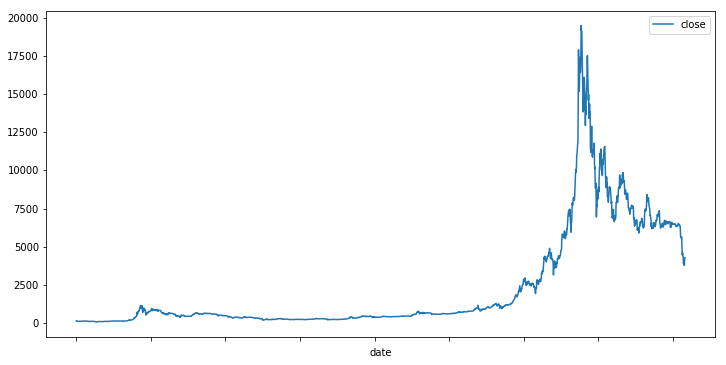

In [15]:
btc.plot(x='date', y='close', figsize=(12,6))

/Users/ZainHussain/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/ZainHussain/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


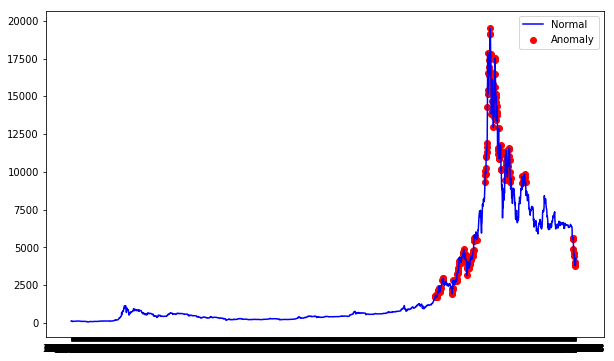

In [29]:
data = btc[['close']]
outliers_fraction=0.1
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 
btc['anomaly2'] = pd.Series(model.predict(data))

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = btc.loc[btc['anomaly2'] == -1, ['date', 'close']] #anomaly

ax.plot(btc['date'], btc['close'], color='blue', label = 'Normal')
ax.scatter(a['date'],a['close'], color='red', label = 'Anomaly')
plt.legend()
plt.show();